In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = "test_2umaH9m.csv.xls"
train = "train_LZdllcl.csv.xls"
sample_sub = "sample_submission_M0L0uXE.csv.xls"

In [4]:
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)
sample_sub_df = pd.read_csv(sample_sub)

In [5]:
train_df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [6]:
train_df["recruitment_channel"].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

In [7]:
train_df["department"].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [8]:
sample_sub_df.head(2)

,employee_id,is_promoted
0,8724,0
1,74430,0


In [9]:
test_df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [11]:
train_df["education"].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

### Data Wrangling

In [12]:
train_df.drop(columns=["employee_id", "previous_year_rating"], inplace=True)

In [13]:
test_df.drop(columns=["employee_id", "previous_year_rating"], inplace=True)

In [14]:
train_df.dropna(inplace=True)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52399 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           52399 non-null  object
 1   region               52399 non-null  object
 2   education            52399 non-null  object
 3   gender               52399 non-null  object
 4   recruitment_channel  52399 non-null  object
 5   no_of_trainings      52399 non-null  int64 
 6   age                  52399 non-null  int64 
 7   length_of_service    52399 non-null  int64 
 8   KPIs_met >80%        52399 non-null  int64 
 9   awards_won?          52399 non-null  int64 
 10  avg_training_score   52399 non-null  int64 
 11  is_promoted          52399 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.2+ MB


In [16]:
test_df.dropna(inplace=True)

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22456 entries, 0 to 23489
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           22456 non-null  object
 1   region               22456 non-null  object
 2   education            22456 non-null  object
 3   gender               22456 non-null  object
 4   recruitment_channel  22456 non-null  object
 5   no_of_trainings      22456 non-null  int64 
 6   age                  22456 non-null  int64 
 7   length_of_service    22456 non-null  int64 
 8   KPIs_met >80%        22456 non-null  int64 
 9   awards_won?          22456 non-null  int64 
 10  avg_training_score   22456 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


### EDA

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


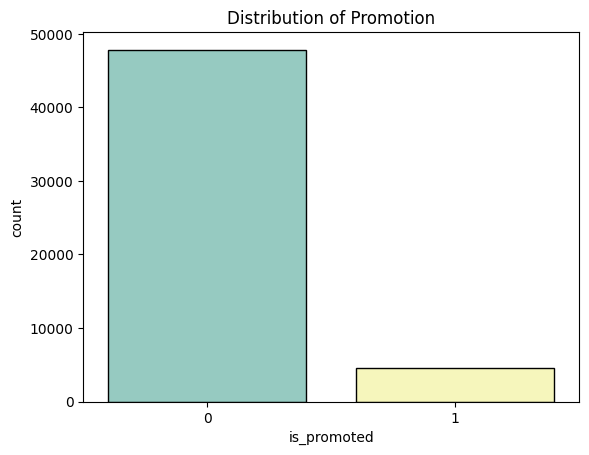

In [18]:
# Distribution of target features
sns.countplot(x="is_promoted", data=train_df, palette='Set3', edgecolor = 'k')
plt.title("Distribution of Promotion")
plt.show() #we see that the distribution is very skewed, so we will balance it later, to prevent bias during modeling

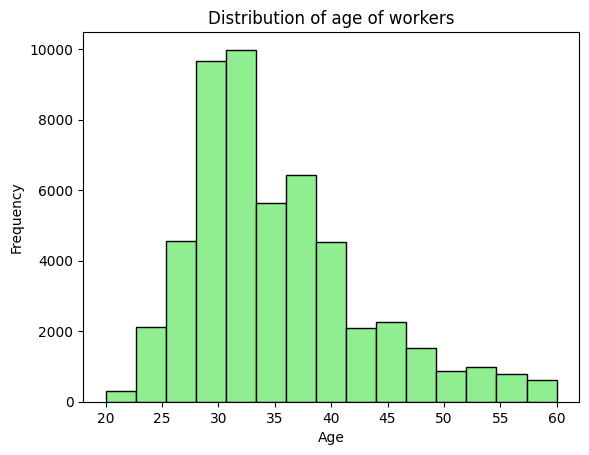

In [19]:
# Distribution of age
plt.hist(train_df["age"], bins=15, edgecolor = 'k', color='lightgreen')
plt.title("Distribution of age of workers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


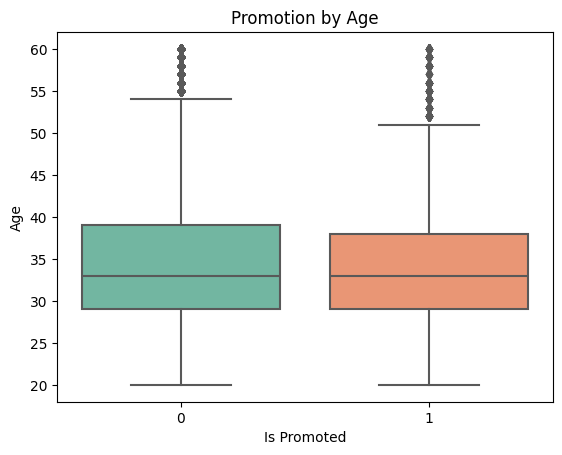

In [20]:
# Distribution of age by promotion

sns.boxplot(x="is_promoted", y= "age", data=train_df, palette='Set2')
plt.title("Promotion by Age")
plt.xlabel("Is Promoted")
plt.ylabel("Age")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


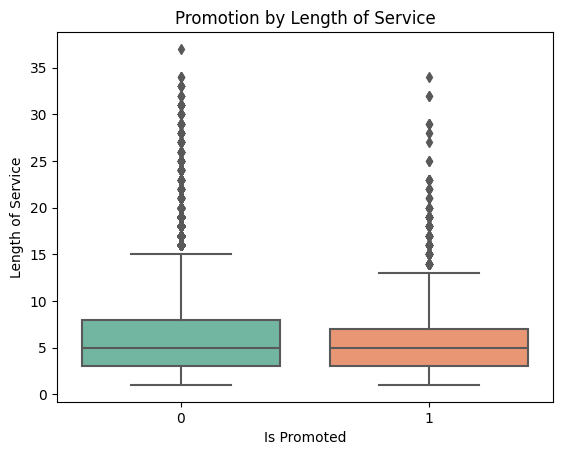

In [21]:
# Distribution of Promotion by Length of Service
sns.boxplot(x="is_promoted", y= "length_of_service", data=train_df, palette='Set2')
plt.title("Promotion by Length of Service")
plt.xlabel("Is Promoted")
plt.ylabel("Length of Service")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


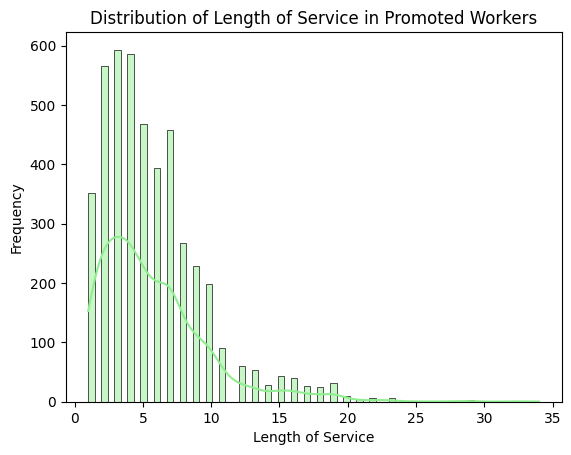

In [22]:
sns.histplot(x=train_df[train_df["is_promoted"]==1]["length_of_service"], kde=True, color='lightgreen')
plt.title("Distribution of Length of Service in Promoted Workers")
plt.xlabel("Length of Service")
plt.ylabel("Frequency")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


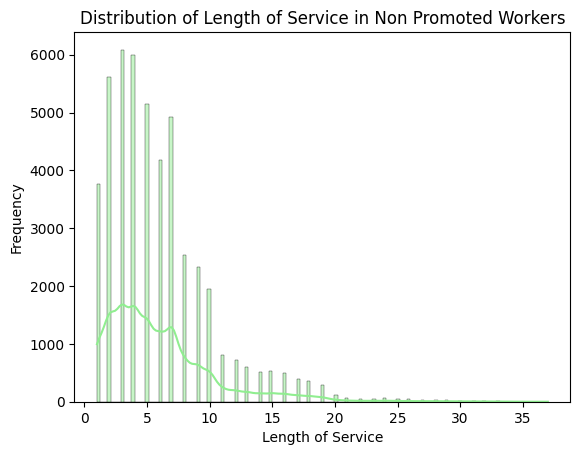

In [23]:
sns.histplot(x = train_df[train_df["is_promoted"]==0]["length_of_service"], kde=True, color="lightgreen", edgecolor = 'k')
plt.title("Distribution of Length of Service in Non Promoted Workers")
plt.xlabel("Length of Service")
plt.ylabel("Frequency")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


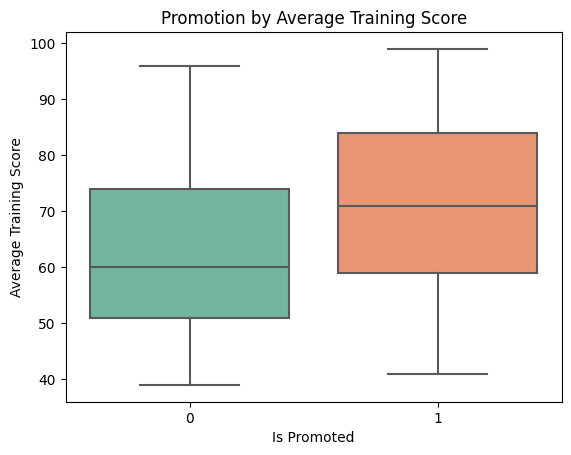

In [24]:
# Distribution of Promotion by Avg Training Score
sns.boxplot(x="is_promoted", y= "avg_training_score", data=train_df, palette='Set2')
plt.title("Promotion by Average Training Score")
plt.xlabel("Is Promoted")
plt.ylabel("Average Training Score")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

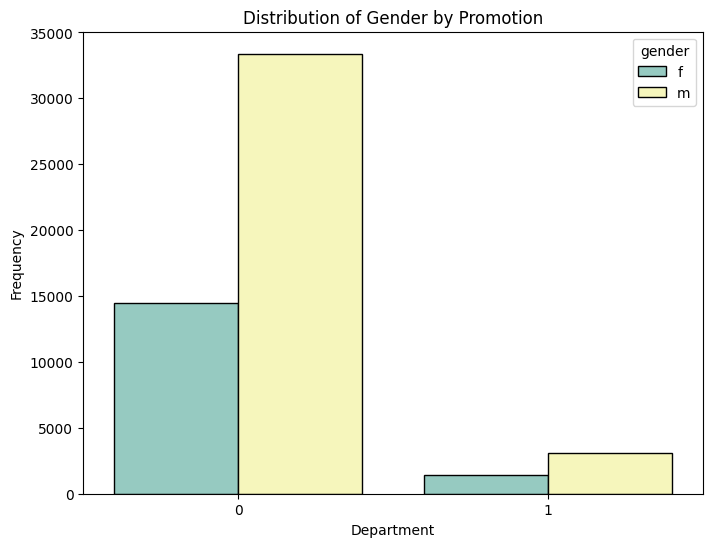

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(x="is_promoted", hue="gender", data= train_df, palette='Set3', edgecolor= 'k')
plt.title("Distribution of Gender by Promotion")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

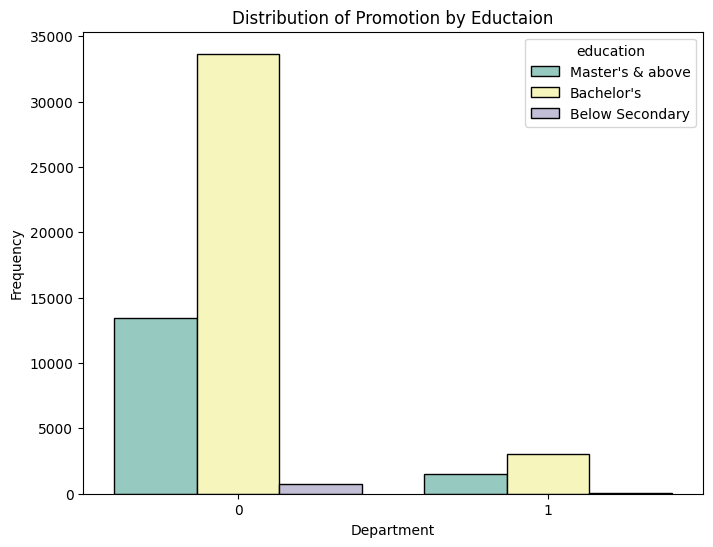

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(x="is_promoted", hue="education", data= train_df, palette='Set3', edgecolor = 'k')
plt.title("Distribution of Promotion by Eductaion")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


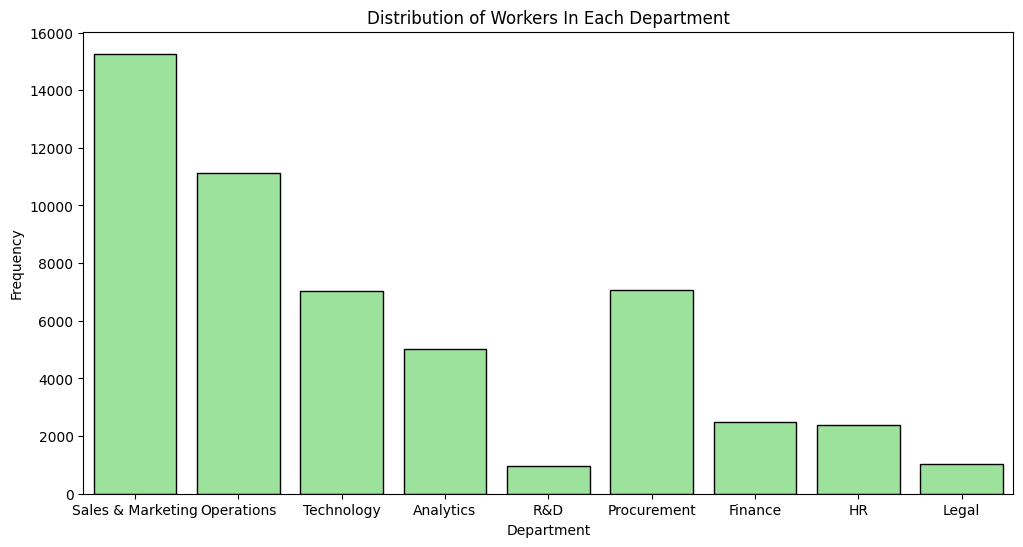

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x="department", data=train_df, color='lightgreen', edgecolor = 'k')
plt.title("Distribution of Workers In Each Department")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.show()

### Data Preprocessing

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52399 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           52399 non-null  object
 1   region               52399 non-null  object
 2   education            52399 non-null  object
 3   gender               52399 non-null  object
 4   recruitment_channel  52399 non-null  object
 5   no_of_trainings      52399 non-null  int64 
 6   age                  52399 non-null  int64 
 7   length_of_service    52399 non-null  int64 
 8   KPIs_met >80%        52399 non-null  int64 
 9   awards_won?          52399 non-null  int64 
 10  avg_training_score   52399 non-null  int64 
 11  is_promoted          52399 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.2+ MB


In [29]:
# One Hot Encode Train DF Categorical Features
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded_train = ohe.fit_transform(train_df[['department', 'region', 'gender', 'recruitment_channel']])

encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out(['department', 'region', 'gender', 'recruitment_channel']))

train_df = pd.concat([train_df, encoded_train_df], axis = 1)

train_df.drop(columns=['department', 'region', 'gender', 'recruitment_channel'], inplace=True)

In [30]:
# Label Encode 'education' column because it is ordinal
from sklearn.preprocessing import LabelEncoder

edu_label = LabelEncoder()

train_df['education'] = edu_label.fit_transform(train_df['education'])

In [31]:
train_df.dropna(inplace=True)

In [32]:
# Separate into features and target set

X = train_df.drop('is_promoted', axis=1)
y_df = train_df['is_promoted']

In [33]:
# Scale X features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_df = pd.DataFrame(X_scaled, columns=X.columns)

In [34]:
# One hot encode test set

encoded_test = ohe.fit_transform(test_df[['department', 'region', 'gender', 'recruitment_channel']])

encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(['department', 'region', 'gender', 'recruitment_channel']))

test_df = pd.concat([test_df, encoded_test_df], axis = 1)

test_df.drop(columns=['department', 'region', 'gender', 'recruitment_channel'], inplace=True)

In [35]:
# Label Encode 'education' column because it is ordinal

test_df['education'] = edu_label.fit_transform(test_df['education'])

In [36]:
# Scale test features

test_scaled = scaler.fit_transform(test_df)

new_test_df = pd.DataFrame(test_scaled, columns=test_df.columns)

In [37]:
new_test_df.dropna(inplace=True)

In [38]:
# Balancing Train Features 
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(X_df, y_df)

### Modeling

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [40]:
# Split data into train and test features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [41]:
# Random Forest Classification

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#Evaluate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
#Classification report
rf_class = classification_report(y_test, rf_pred)

#Print results
print(f"Accuracy score for random forest is : {rf_accuracy}")
print("\nClassification report for random forest:\n", rf_class)

Accuracy score for random forest is : 0.9451635807526353

Classification report for random forest:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      9217
         1.0       0.96      0.93      0.94      9092

    accuracy                           0.95     18309
   macro avg       0.95      0.95      0.95     18309
weighted avg       0.95      0.95      0.95     18309



In [42]:
# # Support Vector Classification

# svc = SVC(random_state=42)
# svc.fit(X_train, y_train)
# svc_pred = svc.predict(X_test)

# #Evaluate accuracy
# svc_accuracy = accuracy_score(y_test, svc_pred)
# #Classification report
# svc_class = classification_report(y_test, svc_pred)

# #Print results
# print(f"Accuracy score for SVC is : {svc_accuracy}")
# print("\nClassification report for SVC:\n",svc_class)

In [43]:
# Gradient Boosting Classifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

#Evaluate accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)
#Classification report
gb_class = classification_report(y_test, gb_pred)

#Print results
print(f"Accuracy Score for Gradient Boosting is : {gb_accuracy}")
print("\nClassification report for Gradient Booosting:\n", gb_class)

Accuracy Score for Gradient Boosting is : 0.9147413840187886

Classification report for Gradient Booosting:
               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      9217
         1.0       0.94      0.88      0.91      9092

    accuracy                           0.91     18309
   macro avg       0.92      0.91      0.91     18309
weighted avg       0.92      0.91      0.91     18309



### Final Submission
- Using Random Forest model

In [44]:
# Predict using test set

new = rf.predict(new_test_df)

len(new)

21479

In [45]:
sample_sub_df.head(2)

,employee_id,is_promoted
0,8724,0
1,74430,0


In [46]:
#extract id from sample submission df
id = sample_sub_df['employee_id']

In [47]:
id.shape

(23490,)

In [48]:
#reshape the id length so it aligns with that of our result
new_id = id.head(len(new))

In [49]:
new_id.shape

(21479,)

In [50]:
#Load new id and test predictions(new) into new dataframe

submission_df = pd.DataFrame({'employee_id': new_id, 'is_promoted': new})

In [51]:
submission_df.head()

,employee_id,is_promoted
0,8724,0.0
1,74430,0.0
2,72255,0.0
3,38562,0.0
4,64486,1.0


In [52]:
submission_df['is_promoted']=submission_df['is_promoted'].astype(int)

In [53]:
submission_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,1


In [54]:
submission_df.to_csv(r"final_submission.csv", index=False)

In [55]:
submission_df.to_csv(r"C:\Users\Dell\Desktop\HR Analytics\final_submission.csv", index=False)